Pymaceuticals Inc.

Analysis

1. The correlation between the average tumor volume (mm3) and weight(g) of the mice that were administerd Capomulin is .84. This is considered to be a strong positive relationship. This can be interpreted as 84% of the variation in the average tumor volume can be explained by the weight of the mouse in grams.

2. There is an outlier in the final tumor volume (mm3) of one of the mice administered the Infubinol regimen. The outlier had a significanly lower final tumor volume (mm3). This outlier should be further investigated for any additional insights.

3. The line plot entitled "Tumor Volume of Mouse B128 Over Time" depicts a reptitive pattern whereby the tumor volume (mm3) decreases over time but rebounds back to larger volume repetitively over time. The data seems to indicate that for every two doses of the drug regimen the tumor volume drops.


In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

 # data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# display mouse_metadata head
mouse_metadata.head(0)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)


In [3]:
# display study_results head
study_results.head(0)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites


In [4]:
# combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# count the number of unique mice in the combined_data DataFrame
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice


249

In [6]:
# the duplicate Mouse ID and Timepoint data from the combined_data DataFrame
duplicate_mice_timepoint = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# the clean_data DataFrame was created by removing Mouse ID g989 from the combined_data DataFrame
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# check the number of mice in the clean DataFrame
number_of_mice_clean_data = clean_data["Mouse ID"].nunique()
number_of_mice_clean_data

248

Summary Statistics

In [9]:
# get the summary statistics for the tumor volume grouped by Drug Regimen
drug_regimen_group = clean_data.groupby("Drug Regimen")
tumor_volume_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
tumor_volume_median = drug_regimen_group["Tumor Volume (mm3)"].median()
tumor_volume_variance = drug_regimen_group["Tumor Volume (mm3)"].var()
tumor_volume_std = drug_regimen_group["Tumor Volume (mm3)"].std()
tumor_volume_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()
timepoint_count = drug_regimen_group["Timepoint"].count()
timepoint_count_cumulative = timepoint_count.cumsum()

# a summary statistics table
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": tumor_volume_mean,
    "Median Tumor Volume": tumor_volume_median,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_std,
    "Tumor Volume Std. Err.": tumor_volume_sem,
    "Timepoint Count": timepoint_count,
    "Timepoint Count Cumulative": timepoint_count_cumulative
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.,Timepoint Count,Timepoint Count Cumulative
Drug Regimen,,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178,408
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178,586
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188,774
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186,960
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181,1141
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148,1289
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228,1517
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181,1698


In [10]:
# using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = drug_regimen_group.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Bar and Pie Charts

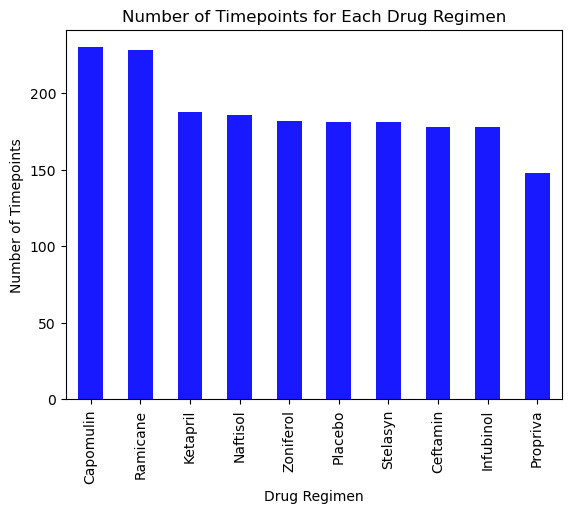

In [11]:
# a pandas dataframe bar plot sorted by the number of timepoints for each drug regimen
timepoint_count_sorted = timepoint_count.sort_values(ascending=False)
timepoint_count_sorted.plot(kind="bar", color="blue", alpha=0.9, align="center", width=0.5)
plt.title("Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()


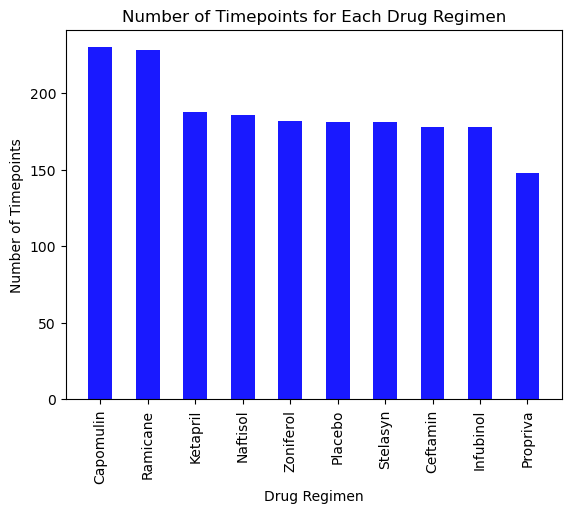

In [12]:
# a pyplot bar plot
plt.bar(timepoint_count_sorted.index, timepoint_count_sorted, color="blue", alpha=0.9, align="center", width=0.5)
plt.title("Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()


In [13]:
# a variable to count the number of male and female mice
sex_counts = clean_data['Sex'].value_counts()

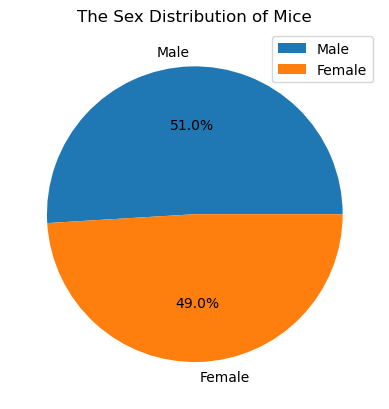

In [14]:
# a pandas pie chart to depict the sex distribution of the mice
sex_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("The Sex Distribution of Mice")
plt.ylabel("")
plt.legend()
plt.show()


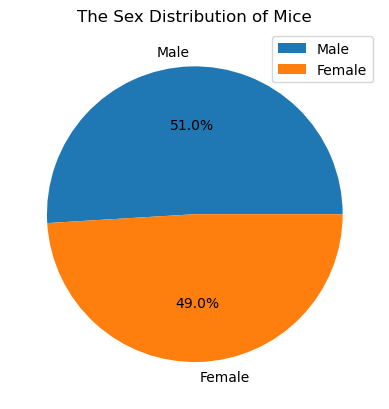

In [15]:
# a pyplot pie chart to depict the sex distribution of the mice
plt.pie(sex_counts.values, labels=sex_counts.index, autopct="%1.1f%%")
plt.title("The Sex Distribution of Mice")
plt.legend()
plt.show()

Quartiles, Outliers and Boxplots

In [16]:
# a dataframe of the last timepoint for each mouse
idx = clean_data.groupby("Mouse ID")["Timepoint"].idxmax()
last_timepoint_data = clean_data.loc[idx]

In [17]:
# reset the index of the last_timepoint_data DataFrame
last_timepoint_data = last_timepoint_data.reset_index(drop=True)
last_timepoint_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [18]:
# Capomulin, Ramicane, Infubinol, and Ceftamin are put into a list
four_drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [19]:
# an empty list to fill with tumor volume data
tumor_volume_data = []

In [20]:
# a for loop to append the tumor_volume_data list
for drug in four_drug_list:
    tumor_volume_data.append(last_timepoint_data.loc[last_timepoint_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"])


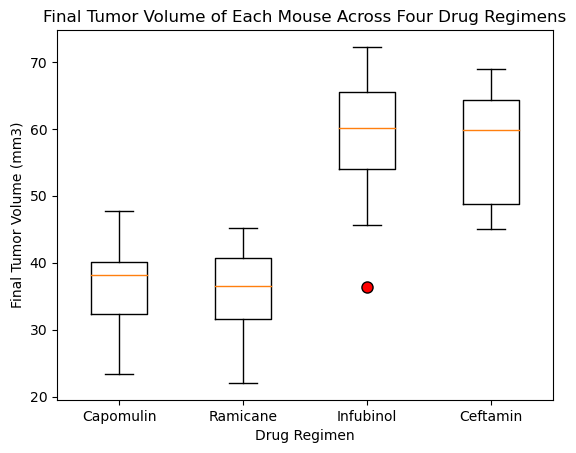

In [21]:
# a box plot to visualize the final tumor volume of each mouse across four drug regimens
plt.boxplot(tumor_volume_data, labels=four_drug_list, flierprops=dict(marker="o", markerfacecolor="red", markersize=8))
plt.title("Final Tumor Volume of Each Mouse Across Four Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

Line Plot Analysis

In [22]:
# filter the clean_data Dataframe on the Drug Regiment Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
count_unique_mice_capomulin = capomulin_data["Mouse ID"].nunique()
print()
print("The number of unique mice tested on Capomulin is", count_unique_mice_capomulin)
print()
print("-" * 110)
print()
capomulin_data.head()


The number of unique mice tested on Capomulin is 25

--------------------------------------------------------------------------------------------------------------



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [23]:
# filter the clean_data Dataframe on the Mouse ID b128
mouse_b128_data = clean_data[clean_data["Mouse ID"] == "b128"]
mouse_b128_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


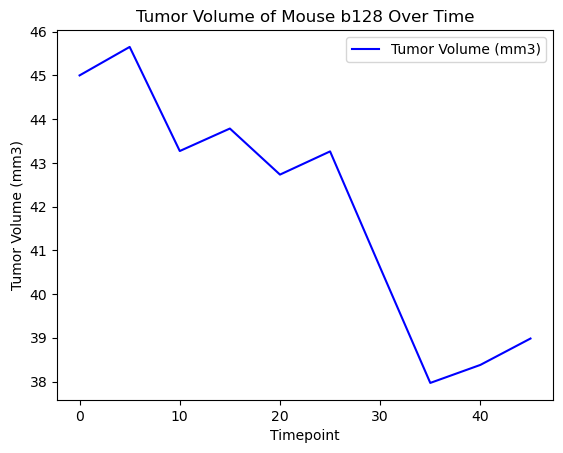

In [24]:
# a DataFrame and line chart to plot the tumor volume of mouse b128 over time
mouse_b128_data.plot(x="Timepoint", y="Tumor Volume (mm3)", color="blue")
plt.title("Tumor Volume of Mouse b128 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Scatter Plot

25


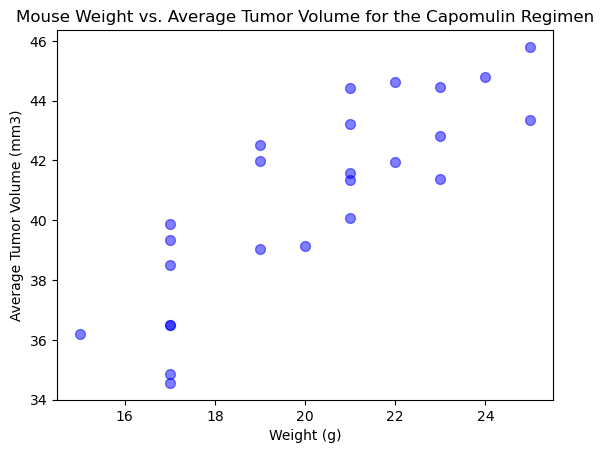

In [25]:
# a DataFrame and scatter plot of the mouse weight versus average tumor volume for the Capomulin regimen
capomulin_group = capomulin_data.groupby("Mouse ID")
average_tumor_volume = capomulin_group["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_group["Weight (g)"].mean()
capomulin_group_unique_mouse_id_count = capomulin_group["Mouse ID"].nunique().sum()
print(capomulin_group_unique_mouse_id_count)
# the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, s=50, color="blue", alpha=0.5)
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


Correlation and Regression Analysis

The correlation between mouse weight and average tumor volume is 0.84


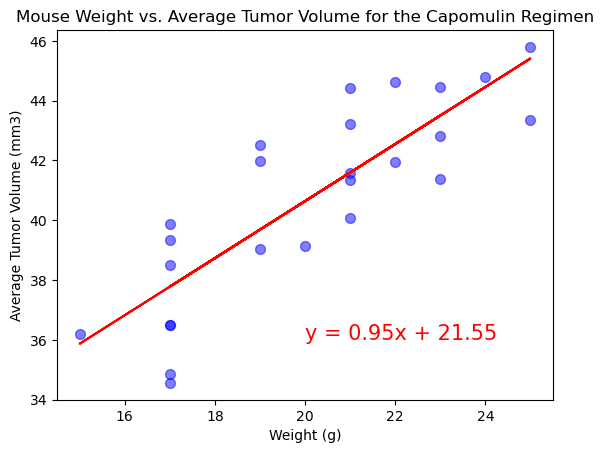

In [26]:
# the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = stats.pearsonr(mouse_weight, average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept

# the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# the scatter plot with the linear regression model
plt.scatter(mouse_weight, average_tumor_volume, s=50, color="blue", alpha=0.5)
plt.plot(mouse_weight, regress_values, color="red")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()